# Linear regression

## Normal Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100, 1)
y = 4 + 3* x + np.random.rand(100, 1)

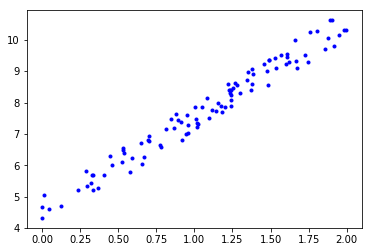

In [2]:
plt.plot(x, y, "b.")

In [3]:
x_b = np.c_[np.ones((100, 1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b,)).dot(x_b.T).dot(y)
theta_best

array([[4.56882524],
       [2.97855253]])

In [4]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 4.56882524],
       [10.5259303 ]])

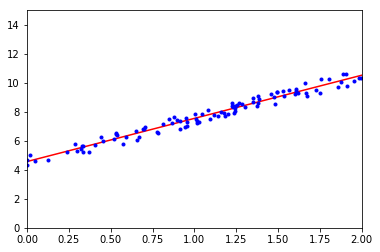

In [5]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.56882524]), array([[2.97855253]]))

In [7]:
lin_reg.predict(x_new)

array([[ 4.56882524],
       [10.5259303 ]])

# Gradient Descent

## Batch Gradient Descent

In [8]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    grad = 2 / m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * grad

In [9]:
theta

array([[4.56882524],
       [2.97855253]])

## Probablistic Gradient Descent

In [10]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # initialize

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        grad = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * grad

theta

array([[4.5791015 ],
       [2.97902505]])

### Using Sklearn

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter= 50, penalty= None, eta0= 0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [12]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.56932951]), array([2.98290563]))

## Mini-Batch Gradient Descent

# Polynomial Regression

In [13]:
m =100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * (x **2) + x + 2 + np.random.randn(m, 1)

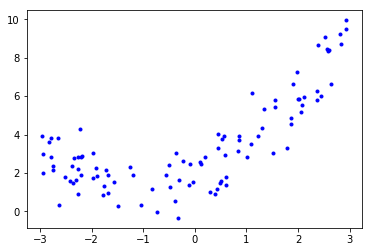

In [14]:
plt.plot(x,y, 'b.')

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_feature.fit_transform(x)
x[0], x_poly[0]

(array([2.0231979]), array([2.0231979 , 4.09332974]))

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.88881986]), array([[1.03780431, 0.49886167]]))

# Learning Curve

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, x, y):
    x_train, x_val ,y_train, y_val = train_test_split(x, y, test_size= 0.2)
    train_err, val_err = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_pred = model.predict(x_train[:m])
        y_val_pred = model.predict(x_val)
        train_err.append(mean_squared_error(y_train[:m], y_train_pred))
        val_err.append(mean_squared_error(y_val, y_val_pred))
    plt.ylim([0, 3])
    plt.xlim([0, 80])
    plt.plot(np.sqrt(train_err), "r-+", linewidth = 2, label='train set')
    plt.plot(np.sqrt(val_err), "b-", linewidth =3, label="test set")
        

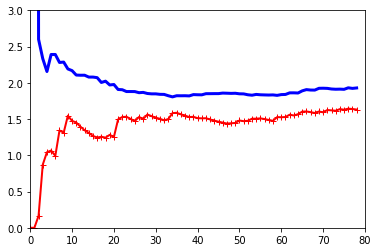

In [26]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, x, y)

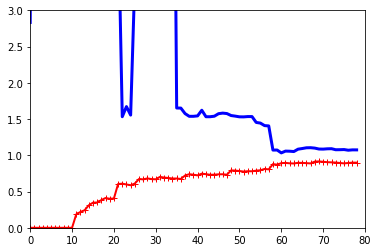

In [28]:
from sklearn.pipeline import Pipeline

poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curve(poly_reg, x, y)

# Linear model with restriction

## Ridge regression

In [29]:
#This model is very sensitive with input scale, so we have to rescale input data scale

In [39]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 1, solver="cholesky")
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[4.95387815]])

In [40]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([3.98615176])

## Least Absolute Shrinkiage and Selection Operator regression
## (LASSO Regression)

In [41]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([4.91035007])

In [42]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l1")
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([3.98655728])

## Elastic Net

In [43]:
#This model is blend above two model , if r = 0 -> Ridge regressor, if r = 1 Lasso regressor

In [44]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha= 0.1, l1_ratio= 0.5)
elastic_net.fit(x, y)
elastic_net.predict([[1.5]])

array([4.91271306])

## Early Stopping

# Logistic Regrssion

In [46]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [47]:
x = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # it is Iris - virginica 1, if not 0

In [48]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

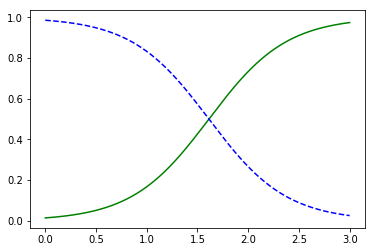

In [49]:
x_new = np.linspace(0, 3 , 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:, 1], "g-", label="iris-virginica")
plt.plot(x_new, y_proba[:, 0], "b--", label= "not iris-virginica")

In [50]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax regression

In [51]:
x = iris["data"][:, (2,3)]
y = iris["target"]

In [56]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs")

0.2